In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df.drop(['person_emp_length','loan_int_rate'],inplace = True, axis = 1)

In [8]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
df['loan_status'] = df['loan_status'].map({1:'yes',0:'no'})

In [10]:
df.head(5)

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,PERSONAL,D,35000,yes,0.59,Y,3
1,21,9600,OWN,EDUCATION,B,1000,no,0.10,N,2
2,25,9600,MORTGAGE,MEDICAL,C,5500,yes,0.57,N,3
3,23,65500,RENT,MEDICAL,C,35000,yes,0.53,N,2
4,24,54400,RENT,MEDICAL,C,35000,yes,0.55,Y,4


In [11]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [12]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [13]:
df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [14]:
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

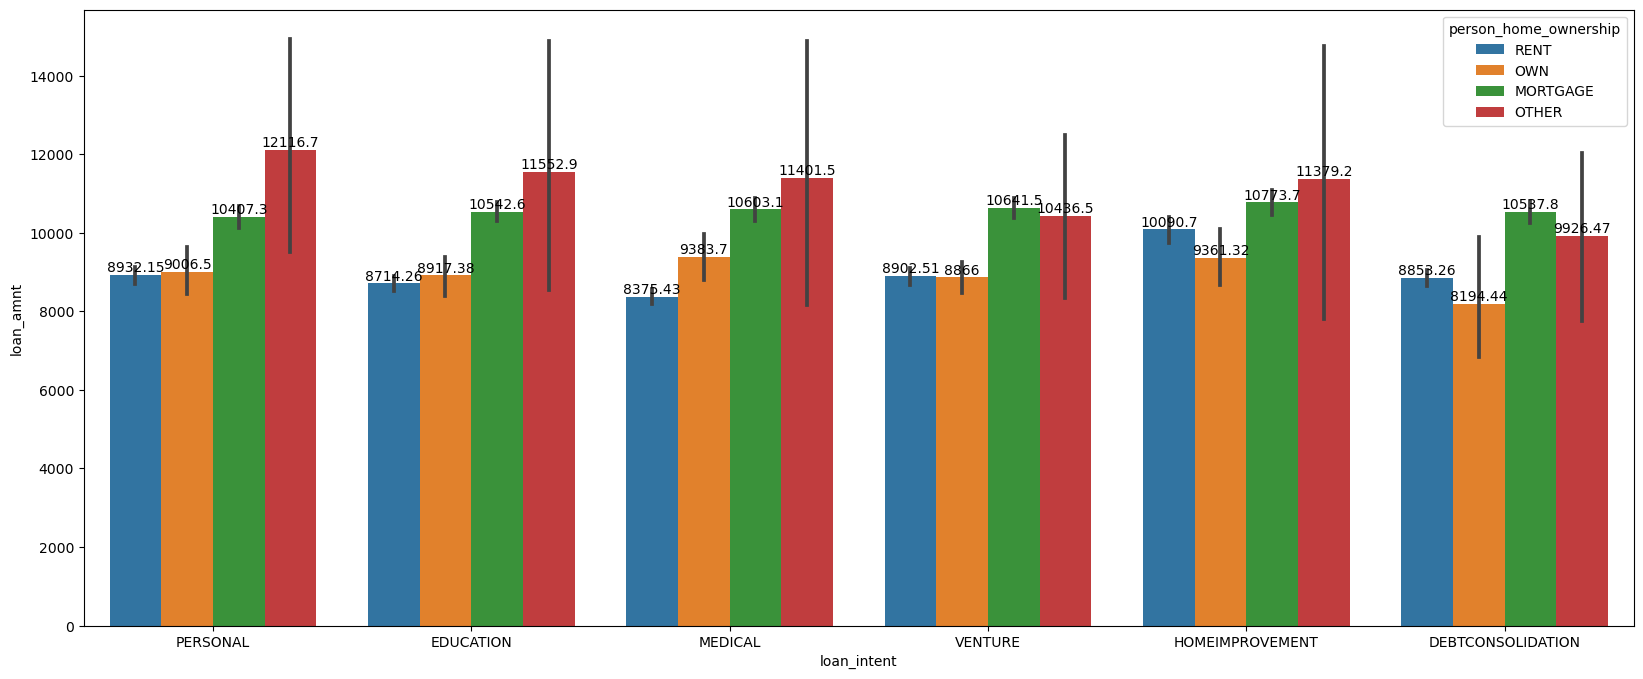

In [15]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x='loan_intent',y='loan_amnt',hue = 'person_home_ownership',data = df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

 In this as over all most of the loan is taken by the homeimprovement  in all aspects as rent,own,mortgage,other

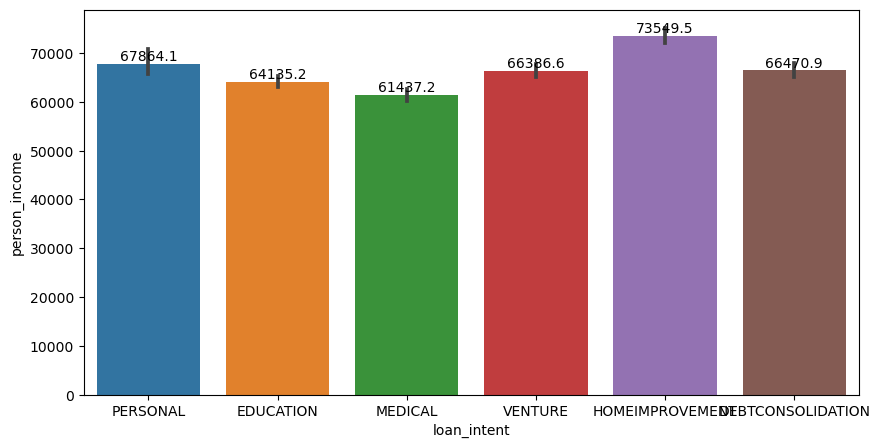

In [16]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x='loan_intent',y='person_income',data = df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

 In this also loan_intent as homeimprovement is having person_income 

### Data Cleaning & Pre-Processing

First selecting the model

In [17]:
X = df[['person_age','person_income','person_home_ownership','loan_intent','loan_grade','loan_amnt','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]
y = df['loan_status']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

In [19]:
X_train.head(2)

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
18046,31,190000,OWN,EDUCATION,A,15000,0.08,N,8
9275,24,54500,MORTGAGE,MEDICAL,D,8000,0.15,N,4


In [20]:
X_test.head(2)

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10775,25,40000,RENT,EDUCATION,B,10000,0.25,N,3
28127,30,125000,MORTGAGE,VENTURE,A,5750,0.05,N,10


In [21]:
print(y_train.head(2))
print(y_train.shape)

18046     no
9275     yes
Name: loan_status, dtype: object
(22806,)


In [22]:
print(y_test.head(2))
print(y_test.shape)

10775    no
28127    no
Name: loan_status, dtype: object
(9775,)


### Separating the numerical columns

In [23]:
train_num = X_train.select_dtypes(include = ['int64','float64'])

In [24]:
test_num = X_test.select_dtypes(include = ['int64','float64'])

In [25]:
train_num.head(2)

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length
18046,31,190000,15000,0.08,8
9275,24,54500,8000,0.15,4


In [26]:
test_num.head(2)

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length
10775,25,40000,10000,0.25,3
28127,30,125000,5750,0.05,10


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(train_num),columns = train_num.columns,index = train_num.index)

In [28]:
X_train_num.head(2)

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length
18046,0.521395,1.921063,0.861154,-0.837814,0.539704
9275,-0.594706,-0.182430,-0.248297,-0.183176,-0.445764


In [29]:
X_test_num = pd.DataFrame(scaler.transform(test_num),columns = test_num.columns,index = test_num.index)

In [30]:
X_test_num.head(2)

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length
10775,-0.435263,-0.407527,0.068689,0.752020,-0.692131
28127,0.361952,0.912007,-0.604906,-1.118372,1.032438


### Separating the categorical columns

In [31]:
train_cat_ohe = X_train[['cb_person_default_on_file','person_home_ownership']]

In [32]:
train_cat_ohe.head()

,cb_person_default_on_file,person_home_ownership
18046,N,OWN
9275,N,MORTGAGE
5210,N,MORTGAGE
9775,N,MORTGAGE
27803,N,MORTGAGE


In [33]:
test_cat_ohe = X_test[['cb_person_default_on_file','person_home_ownership']]

In [34]:
test_cat_ohe.head()

,cb_person_default_on_file,person_home_ownership
10775,N,RENT
28127,N,MORTGAGE
17835,N,RENT
15419,N,MORTGAGE
20158,N,RENT


In [35]:
li = {'PERSONAL':1, 'EDUCATION':2, 'MEDICAL':3, 'VENTURE':4, 'HOMEIMPROVEMENT':5,'DEBTCONSOLIDATION':6}
lg = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}


In [36]:
X_train['loan_intent'] = X_train['loan_intent'].apply(lambda x:li[x])

In [37]:
X_train['loan_grade'] = X_train['loan_grade'].apply(lambda x:lg[x])

In [38]:
X_train_cat_le = X_train[['loan_intent','loan_grade']]
X_train_cat_le.head(2)

,loan_intent,loan_grade
18046,2,1
9275,3,4


In [39]:
X_test['loan_intent'] = X_test['loan_intent'].apply(lambda x:li[x])

In [40]:
X_test['loan_grade'] = X_test['loan_grade'].apply(lambda x:lg[x])

In [41]:
X_test_cat_le = X_test[['loan_intent','loan_grade']]
X_test_cat_le.head(2)

,loan_intent,loan_grade
10775,2,2
28127,4,1


In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first',sparse = False)
X_train_cat = pd.DataFrame(ohe.fit_transform(train_cat_ohe),columns = ohe.get_feature_names_out(train_cat_ohe.columns),index = train_cat_ohe.index)
X_train_cat.head(2)

C:\Users\2220075\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,cb_person_default_on_file_Y,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
18046,0.0,0.0,1.0,0.0
9275,0.0,0.0,0.0,0.0


In [43]:
X_test_cat = pd.DataFrame(ohe.transform(test_cat_ohe),columns = ohe.get_feature_names_out(test_cat_ohe.columns),index = test_cat_ohe.index)
X_test_cat.head(2)

,cb_person_default_on_file_Y,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
10775,0.0,0.0,0.0,1.0
28127,0.0,0.0,0.0,0.0


### Concatinating the numerical and categorical

In [48]:
X_train_transformed = pd.concat([X_train_num,X_train_cat,X_train_cat_le],axis = 1)
X_train_transformed.head()

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_Y,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent,loan_grade
18046,0.521395,1.921063,0.861154,-0.837814,0.539704,0.0,0.0,1.0,0.0,2,1
9275,-0.594706,-0.182430,-0.248297,-0.183176,-0.445764,0.0,0.0,0.0,0.0,3,4
5210,-0.754149,-0.432366,0.861154,2.061294,-0.692131,0.0,0.0,0.0,0.0,6,4
9775,-0.913592,-0.034953,-1.199255,-1.305412,-0.445764,0.0,0.0,0.0,0.0,3,1
27803,0.043066,2.464401,-0.565283,-1.305412,0.293337,0.0,0.0,0.0,0.0,6,2


In [50]:
X_test_transformed = pd.concat([X_test_num,X_test_cat,X_test_cat_le],axis = 1)
X_test_transformed.head()

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_Y,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent,loan_grade
10775,-0.435263,-0.407527,0.068689,0.752020,-0.692131,0.0,0.0,0.0,1.0,2,2
28127,0.361952,0.912007,-0.604906,-1.118372,1.032438,0.0,0.0,0.0,0.0,4,1
17835,0.202509,0.065953,4.031015,3.090010,0.046970,0.0,0.0,0.0,1.0,1,1
15419,-0.275820,1.067247,-0.454338,-1.118372,-0.445764,0.0,0.0,0.0,0.0,2,1
20158,0.361952,-0.500671,-0.882269,-0.463735,1.032438,0.0,0.0,0.0,1.0,4,2


### Algorithm

#### Model - 1 

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_transformed,y_train)

LogisticRegression()

In [53]:
y_predict = lr.predict(X_test_transformed)

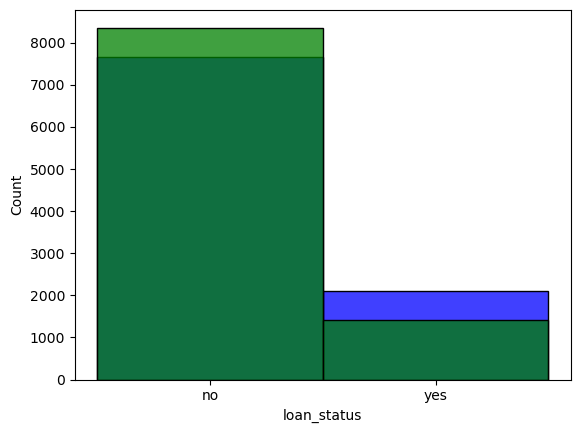

In [60]:
sns.histplot(y_test,color = 'blue')
sns.histplot(y_predict,color = 'green')
plt.show()

In [62]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict,pos_label = 'no')

0.9098396455980533

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8521739130434782

#### Model - 2

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [68]:
y_predict2 = knc.predict(X_test_transformed)

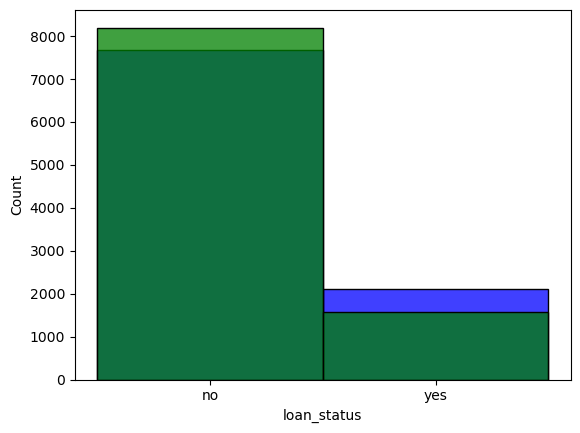

In [69]:
sns.histplot(y_test,color = 'blue')
sns.histplot(y_predict2,color = 'green')
plt.show()

In [70]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict2,pos_label = 'no')

0.9309801449732115

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict2)

0.8879795396419438

#### Model - 3

In [73]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed,y_train)

SVC()

In [74]:
y_predict3 = svc.predict(X_test_transformed)

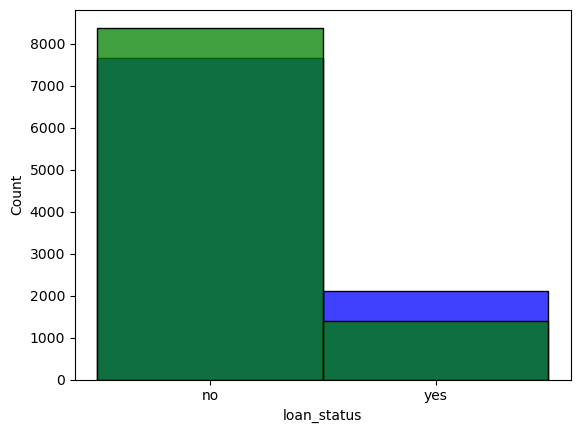

In [75]:
sns.histplot(y_test,color = 'blue')
sns.histplot(y_predict3,color = 'green')
plt.show()

In [76]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict3,pos_label = 'no')

0.9305019305019305

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict3)

0.8858312020460358

#### Model - 4

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [81]:
y_predict4 = dt.predict(X_test_transformed)

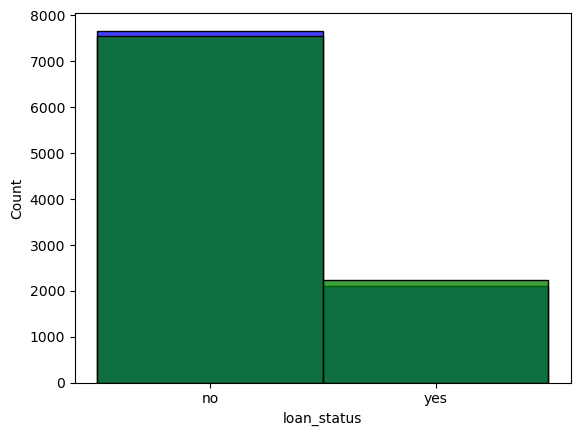

In [82]:
sns.histplot(y_test,color = 'blue')
sns.histplot(y_predict4,color = 'green')
plt.show()

In [83]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict4,pos_label = 'no')

0.9183150423868043

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict4)

0.8728388746803069

#### Model - 5

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [87]:
y_predict5 = rfc.predict(X_test_transformed)

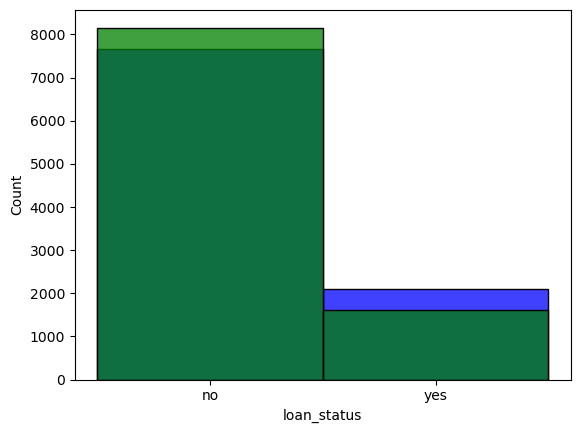

In [88]:
sns.histplot(y_test,color = 'blue')
sns.histplot(y_predict5,color = 'green')
plt.show()

In [89]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict5,pos_label = 'no')

0.9514722608365979

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict5)

0.9214322250639386

- Finally we can conclude that random forest model is giving the best prediction with f1_score = 95% and accuracy_score = 92%

- second best model is KNeighbor classifier with f1_score = 93% and accuracy_score = 87%